In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import cumsum
import seaborn as sns
from matplotlib.patches import Rectangle
import matplotlib.lines as lines
import subprocess
import os
import json
import csv

In [2]:
# READ DATA
import out.store as store

LOCs = store.LOCStore(DIR='out/')
RESULTS = store.Results(DIR='out/')

releases = []
with open('jquery_releases.csv', mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
        releases.append(row)

# Testing on partial dataset? Cut part out!
#releases = releases[:17]

# Releases is reversed? So reverse it back!
releases = releases[::-1]

matrix = np.empty((len(releases), len(releases)), dtype=float)
matrix[:,:] = np.NaN
#print(RESULTS.get('1.11.0', '1.4.2'))
for i_1, release_1 in enumerate(releases):
    for i_2, release_2 in enumerate(releases[:i_1]):
        tag_1 = release_1['tag']
        tag_2 = release_2['tag']
        print(tag_1,tag_2)
        try:
            matrix[i_1, i_2] = RESULTS.get(tag_1, tag_2)
        except:
            matrix[i_1, i_2] = 0
        
locs = np.array([LOCs.get(r['tag']) for r in releases])

#print([r['tag'] for r in releases])
#print(matrix)
#print(locs)

1.0.1 1.0
1.0.2 1.0
1.0.2 1.0.1
1.0.3 1.0
1.0.3 1.0.1
1.0.3 1.0.2
1.0.4 1.0
1.0.4 1.0.1
1.0.4 1.0.2
1.0.4 1.0.3
1.1 1.0
1.1 1.0.1
1.1 1.0.2
1.1 1.0.3
1.1 1.0.4
1.1.1 1.0
1.1.1 1.0.1
1.1.1 1.0.2
1.1.1 1.0.3
1.1.1 1.0.4
1.1.1 1.1
1.1.2 1.0
1.1.2 1.0.1
1.1.2 1.0.2
1.1.2 1.0.3
1.1.2 1.0.4
1.1.2 1.1
1.1.2 1.1.1
1.1.3 1.0
1.1.3 1.0.1
1.1.3 1.0.2
1.1.3 1.0.3
1.1.3 1.0.4
1.1.3 1.1
1.1.3 1.1.1
1.1.3 1.1.2
1.1.3.1 1.0
1.1.3.1 1.0.1
1.1.3.1 1.0.2
1.1.3.1 1.0.3
1.1.3.1 1.0.4
1.1.3.1 1.1
1.1.3.1 1.1.1
1.1.3.1 1.1.2
1.1.3.1 1.1.3
1.1.4 1.0
1.1.4 1.0.1
1.1.4 1.0.2
1.1.4 1.0.3
1.1.4 1.0.4
1.1.4 1.1
1.1.4 1.1.1
1.1.4 1.1.2
1.1.4 1.1.3
1.1.4 1.1.3.1
1.2 1.0
1.2 1.0.1
1.2 1.0.2
1.2 1.0.3
1.2 1.0.4
1.2 1.1
1.2 1.1.1
1.2 1.1.2
1.2 1.1.3
1.2 1.1.3.1
1.2 1.1.4
1.2.1 1.0
1.2.1 1.0.1
1.2.1 1.0.2
1.2.1 1.0.3
1.2.1 1.0.4
1.2.1 1.1
1.2.1 1.1.1
1.2.1 1.1.2
1.2.1 1.1.3
1.2.1 1.1.3.1
1.2.1 1.1.4
1.2.1 1.2
1.2.2 1.0
1.2.2 1.0.1
1.2.2 1.0.2
1.2.2 1.0.3
1.2.2 1.0.4
1.2.2 1.1
1.2.2 1.1.1
1.2.2 1.1.2
1.2.2 1.1.3
1.2.2 1.

1.7.0 1.1.2
1.7.0 1.1.3
1.7.0 1.1.3.1
1.7.0 1.1.4
1.7.0 1.2
1.7.0 1.2.1
1.7.0 1.2.2
1.7.0 1.2.3
1.7.0 1.2.4
1.7.0 1.2.5
1.7.0 1.2.6
1.7.0 1.3
1.7.0 1.3.0
1.7.0 1.3.1
1.7.0 1.3.2
1.7.0 1.4
1.7.0 1.4.0
1.7.0 1.4.1
1.7.0 1.4.2
1.7.0 1.4.3
1.7.0 1.4.4
1.7.0 1.5
1.7.0 1.5.0
1.7.0 1.5.1
1.7.0 1.5.2
1.7.0 1.6
1.7.0 1.6.0
1.7.0 1.6.1
1.7.0 1.6.2
1.7.0 1.6.3
1.7.0 1.6.4
1.7.0 1.7
1.7.1 1.0
1.7.1 1.0.1
1.7.1 1.0.2
1.7.1 1.0.3
1.7.1 1.0.4
1.7.1 1.1
1.7.1 1.1.1
1.7.1 1.1.2
1.7.1 1.1.3
1.7.1 1.1.3.1
1.7.1 1.1.4
1.7.1 1.2
1.7.1 1.2.1
1.7.1 1.2.2
1.7.1 1.2.3
1.7.1 1.2.4
1.7.1 1.2.5
1.7.1 1.2.6
1.7.1 1.3
1.7.1 1.3.0
1.7.1 1.3.1
1.7.1 1.3.2
1.7.1 1.4
1.7.1 1.4.0
1.7.1 1.4.1
1.7.1 1.4.2
1.7.1 1.4.3
1.7.1 1.4.4
1.7.1 1.5
1.7.1 1.5.0
1.7.1 1.5.1
1.7.1 1.5.2
1.7.1 1.6
1.7.1 1.6.0
1.7.1 1.6.1
1.7.1 1.6.2
1.7.1 1.6.3
1.7.1 1.6.4
1.7.1 1.7
1.7.1 1.7.0
1.7.2 1.0
1.7.2 1.0.1
1.7.2 1.0.2
1.7.2 1.0.3
1.7.2 1.0.4
1.7.2 1.1
1.7.2 1.1.1
1.7.2 1.1.2
1.7.2 1.1.3
1.7.2 1.1.3.1
1.7.2 1.1.4
1.7.2 1.2
1.7.2 1.2.1
1.7.2 1.

2.0.2 1.8.3
2.0.2 1.9.0
2.0.2 1.9.1
2.0.2 1.10.0
2.0.2 1.10.1
2.0.2 1.10.2
2.0.2 1.11.0
2.0.2 1.11.1
2.0.2 1.11.2
2.0.2 1.11.3
2.0.2 1.12.0
2.0.2 1.12.1
2.0.2 1.12.2
2.0.2 1.12.3
2.0.2 1.12.4
2.0.2 2.0.0
2.0.2 2.0.1
2.0.3 1.0
2.0.3 1.0.1
2.0.3 1.0.2
2.0.3 1.0.3
2.0.3 1.0.4
2.0.3 1.1
2.0.3 1.1.1
2.0.3 1.1.2
2.0.3 1.1.3
2.0.3 1.1.3.1
2.0.3 1.1.4
2.0.3 1.2
2.0.3 1.2.1
2.0.3 1.2.2
2.0.3 1.2.3
2.0.3 1.2.4
2.0.3 1.2.5
2.0.3 1.2.6
2.0.3 1.3
2.0.3 1.3.0
2.0.3 1.3.1
2.0.3 1.3.2
2.0.3 1.4
2.0.3 1.4.0
2.0.3 1.4.1
2.0.3 1.4.2
2.0.3 1.4.3
2.0.3 1.4.4
2.0.3 1.5
2.0.3 1.5.0
2.0.3 1.5.1
2.0.3 1.5.2
2.0.3 1.6
2.0.3 1.6.0
2.0.3 1.6.1
2.0.3 1.6.2
2.0.3 1.6.3
2.0.3 1.6.4
2.0.3 1.7
2.0.3 1.7.0
2.0.3 1.7.1
2.0.3 1.7.2
2.0.3 1.8.0
2.0.3 1.8.1
2.0.3 1.8.2
2.0.3 1.8.3
2.0.3 1.9.0
2.0.3 1.9.1
2.0.3 1.10.0
2.0.3 1.10.1
2.0.3 1.10.2
2.0.3 1.11.0
2.0.3 1.11.1
2.0.3 1.11.2
2.0.3 1.11.3
2.0.3 1.12.0
2.0.3 1.12.1
2.0.3 1.12.2
2.0.3 1.12.3
2.0.3 1.12.4
2.0.3 2.0.0
2.0.3 2.0.1
2.0.3 2.0.2
2.1.0 1.0
2.1.0 1.0.1
2.1.0 1.

3.2.0 2.0.2
3.2.0 2.0.3
3.2.0 2.1.0
3.2.0 2.1.1
3.2.0 2.1.2
3.2.0 2.1.3
3.2.0 2.1.4
3.2.0 2.2.0
3.2.0 2.2.1
3.2.0 2.2.2
3.2.0 2.2.3
3.2.0 2.2.4
3.2.0 3.0.0
3.2.0 3.1.0
3.2.0 3.1.1
3.2.1 1.0
3.2.1 1.0.1
3.2.1 1.0.2
3.2.1 1.0.3
3.2.1 1.0.4
3.2.1 1.1
3.2.1 1.1.1
3.2.1 1.1.2
3.2.1 1.1.3
3.2.1 1.1.3.1
3.2.1 1.1.4
3.2.1 1.2
3.2.1 1.2.1
3.2.1 1.2.2
3.2.1 1.2.3
3.2.1 1.2.4
3.2.1 1.2.5
3.2.1 1.2.6
3.2.1 1.3
3.2.1 1.3.0
3.2.1 1.3.1
3.2.1 1.3.2
3.2.1 1.4
3.2.1 1.4.0
3.2.1 1.4.1
3.2.1 1.4.2
3.2.1 1.4.3
3.2.1 1.4.4
3.2.1 1.5
3.2.1 1.5.0
3.2.1 1.5.1
3.2.1 1.5.2
3.2.1 1.6
3.2.1 1.6.0
3.2.1 1.6.1
3.2.1 1.6.2
3.2.1 1.6.3
3.2.1 1.6.4
3.2.1 1.7
3.2.1 1.7.0
3.2.1 1.7.1
3.2.1 1.7.2
3.2.1 1.8.0
3.2.1 1.8.1
3.2.1 1.8.2
3.2.1 1.8.3
3.2.1 1.9.0
3.2.1 1.9.1
3.2.1 1.10.0
3.2.1 1.10.1
3.2.1 1.10.2
3.2.1 1.11.0
3.2.1 1.11.1
3.2.1 1.11.2
3.2.1 1.11.3
3.2.1 1.12.0
3.2.1 1.12.1
3.2.1 1.12.2
3.2.1 1.12.3
3.2.1 1.12.4
3.2.1 2.0.0
3.2.1 2.0.1
3.2.1 2.0.2
3.2.1 2.0.3
3.2.1 2.1.0
3.2.1 2.1.1
3.2.1 2.1.2
3.2.1 2.1.3
3.2.1 

In [3]:
# INFO
#releases is the list of releases, where a release is a dictionary. Use release['tag'] to get the release tag
#matrix is the data matrix with at index i,j the metric calculated for release[i] against release[j]
#use LOCs.get(version string) to get the LOC for a specific release['tag']

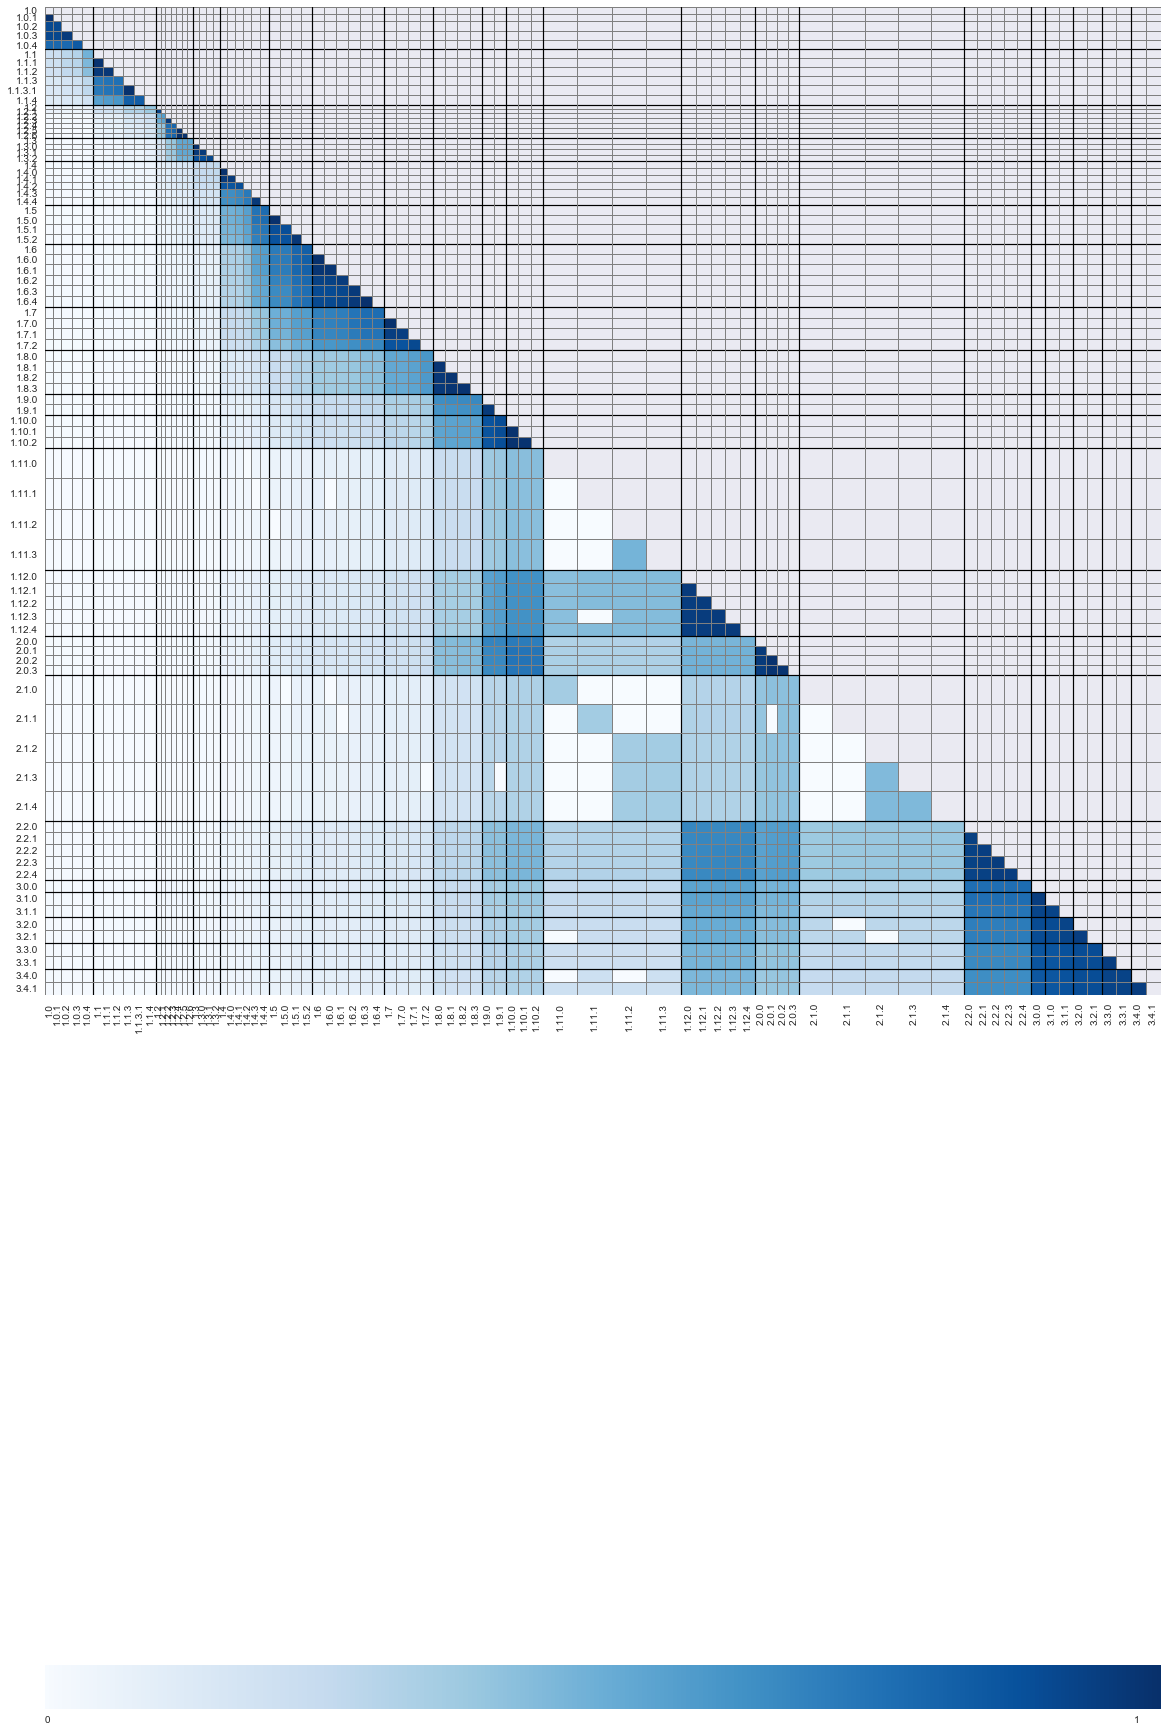

In [4]:
label_names = [r['tag'] for r in releases]

#Get color distribution
c_map = plt.get_cmap('Blues')

fig, axes = plt.subplots(2, figsize=(20,40))

#size = np.array([10,15,16,20,25,30,40,50,60,80,100]) # size will be lines of code
box_start = np.union1d([0],cumsum(locs))
s = sum(locs)

# Make the lines inbetween the boxes.
for i, p in enumerate(box_start):
    if ( i < len(label_names) and (label_names[i].split('.')[1] != label_names[i-1 if i-1 >0 else 0].split('.')[1])):
        axes[0].add_line(lines.Line2D([0, s], [p, p], linewidth = 1.2, color = 'black'))
        axes[0].add_line(lines.Line2D([p, p], [0, s], linewidth = 1.2, color = 'black'))
    else:
        axes[0].add_line(lines.Line2D([0, s], [p, p], linewidth = 1, color = 'grey'))
        axes[0].add_line(lines.Line2D([p, p], [0, s], linewidth = 1, color = 'grey'))

# Make all the boxes
for c in range(len(locs)):
    for r in range(len(locs)):
        if (c>r):
            rect = Rectangle((box_start[r],box_start[c]),locs[r],locs[c],linewidth=1,edgecolor='r',facecolor=c_map(matrix[c,r]))
            axes[0].add_patch(rect)

# this is for the legend
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))
            
# Setup the labels
axes[0].set_ylim([0,s])   
axes[0].set_xlim([0, s])
axes[0].invert_yaxis()
axes[0].set_xticks(box_start[:-1]+0.5*locs) #put labels in the middle of the box
axes[0].set_yticks(box_start[:-1]+0.5*locs)
axes[0].set_xticklabels(label_names, rotation = 90)
axes[0].set_yticklabels(label_names)

axes[0].grid(False)

axes[1].imshow(gradient, aspect = '5', cmap=c_map)
axes[1].grid(False)
axes[1].set_xticks([0,250])
axes[1].set_yticks([]) 
axes[1].set_xticklabels(['0','1'])

plt.show()

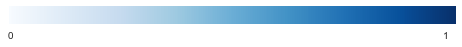

In [5]:
# Make only the legend
fig, ax = plt.subplots(1)
ax.imshow(gradient, aspect = '5', cmap=plt.get_cmap('Blues'))
ax.grid(False)
ax.set_xticks([0,250])
ax.set_yticks([])
ax.set_xticklabels(['0','1'])
plt.show()
